<a href="https://colab.research.google.com/github/Metodoscomputacionales1/Metodos1_PedroAngarita_SimonUribe/blob/main/Tarea5/Ejercicio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [26]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/Datos/")
!ls

Exponencial.dat  MediaMovilData.csv  MinimosCuadratico.txt  MinimosLineal.txt


In [27]:
file = '/content/drive/MyDrive/Colab Notebooks/Datos/MinimosCuadratico.txt'
file

'/content/drive/MyDrive/Colab Notebooks/Datos/MinimosCuadratico.txt'

In [28]:
data = pd.read_csv(file)
data.head(10)

,0.000000e+00 -3.348886e+00
0,5.263158e-01 1.077900e+01
1,1.052632e+00 1.312721e+01
2,1.578947e+00 2.120879e+01
3,2.105263e+00 2.063223e+01
4,2.631579e+00 3.411089e+01
5,3.157895e+00 6.066644e+01
6,3.684211e+00 5.507888e+01
7,4.210526e+00 8.189598e+01
8,4.736842e+00 9.683438e+01
9,5.263158e+00 1.175549e+02


In [29]:
data = pd.read_csv(file,sep=' ')
data.columns = ['x','y']
data

,x,y
0,0.526316,10.77900
1,1.052632,13.12721
2,1.578947,21.20879
3,2.105263,20.63223
4,2.631579,34.11089
5,3.157895,60.66644
6,3.684211,55.07888
7,4.210526,81.89598
8,4.736842,96.83438
9,5.263158,117.55490


In [30]:
x = np.array(data['x'])
y = np.array(data['y'])

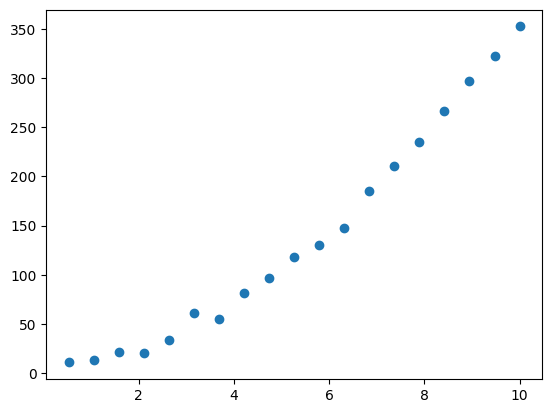

In [31]:
plt.scatter(x,y)

In [40]:
def GetFit(x,y,n):
  l=x.shape[0]
  b=y
  A=np.ones((l,n+1))
  for i in range(1,n+1):
    A[:,i]=x**i
    #Esto hace que cada columan sea el grado de x
  AT=np.dot(A.T,A)
  bT=np.dot(A.T,b)
  xsol=np.linalg.solve(AT,bT)

  return xsol

#primera columna 1s, la segunda xs, la tercesa seria x**2 y asi sucesivamente
sol=np.round(GetFit(x,y,2),2)
sol

array([3.91, 5.04, 3.04])

In [34]:
def GetModel(x,p):
  y=0.
  for n in range(len(p)):
    y+=p[n]*x**n
  return y

In [41]:
import sympy as sym
X=sym.Symbol('x')
ecu=GetModel(X,sol)
ecu

3.04*x**2 + 5.04*x + 3.91

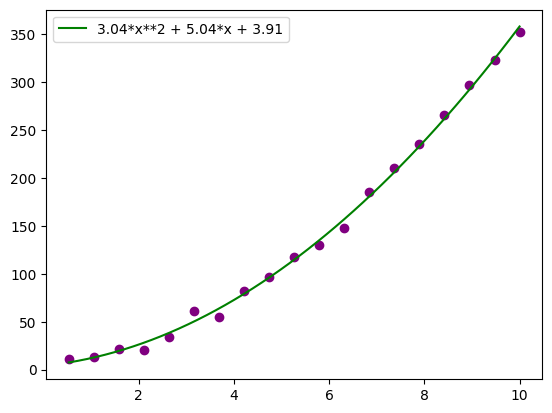

In [42]:
xi=np.linspace(np.min(x),np.max(x),50)
yi=GetModel(xi,sol)
plt.scatter(x,y, color="purple")
plt.plot(xi,yi, color='green', label=ecu)
plt.legend()